In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

# Reading the first few rows of the CSV fileone 
depth4_19 = '/Users/ron/Code/master_thesis/results/stats_2023-11-24 03:51:18.452267.csv'
depth4_29 = '/Users/ron/Code/master_thesis/results/stats_2023-12-01 17:07:39.195518.csv'
depth4_inference_all_after_training_on_19 = '/Users/ron/Code/master_thesis/results/stats_2023-11-30 11:14:48.912478.csv'
depth4_inference_all_after_training_on_29 = '/Users/ron/Code/master_thesis/results/stats_2023-12-04 19:37:08.204531.csv'
depth3_inference_all_trained_on_4_tasks = '/Users/ron/Code/master_thesis/results/stats_2023-11-29 13:38:47.483420.csv'
depth3_trained_on_4_tasks = '/Users/ron/Code/master_thesis/results/stats_2023-11-29 11:24:58.566967.csv'
depth3_trained_on_4_tasks_inference_37_tasks = '/Users/ron/Code/master_thesis/results/stats_2023-11-29 13:24:37.473425.csv'
depth3_trained_on_48_tasks_random_seed_1704 = '/Users/ron/Code/master_thesis/results/depth_3_48_tasks2023-12-07 22:24:45.csv'
depth3_trained_on_48_tasks_random_seed_1704_inference = '/Users/ron/Code/master_thesis/results/depth_3_48_tasks2023-12-07 22:24:45_inference.csv'
depth3_trained_on_48_tasks_random_seed_42 = '/Users/ron/Code/master_thesis/results/depth_3_48_tasks2023-12-07 22:41:39.csv'
depth3_trained_on_48_tasks_random_seed_42_inference = '/Users/ron/Code/master_thesis/results/depth_3_48_tasks2023-12-07 22:41:392023-12-13 00:00:12_inference.csv'

# Utils

In [84]:
# Frequency of Program Creation per Task
def program_creation_frequency(data):
    return data.groupby(['Task Name', 'Program']).size().reset_index(name='Frequency')

# Unique Programs per Task
def total_program_variations(data):
    grouped = data.groupby('Task Name')['Program'].nunique()
    return grouped.reset_index(name='Frequency')

# Number of Unique Programs per Task
def program_variations(data):
    return data.groupby('Task Name')['Program'].nunique()

# Variation in Solutions
def solution_variations(data):
    solved_data = data[data['Solved'] == True]
    return solved_data.groupby('Task Name')['Program'].nunique()

# Unique tasks in training
def unique_train_tasks(data):
    return data[data['Mode'] == 'e-step']['Task Name'].unique()

# Unique 
def unique_solved(data):
    return data[data['Solved'] == True]['Task Name'].unique()

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join

filepath='/Users/ron/Code/master_thesis/report/LaTeX/img'

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Function to create a histogram for program creation frequency per task
# This answers the question: how often were programs resampled to no avail
def plot_program_creation_frequency(data):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x='Frequency', bins=80)
    plt.title('Histogram of Program Creation Frequency')
    plt.xlabel('Frequency')
    plt.ylabel('Count')
    plt.savefig(join(filepath, 'plot_program_creation_frequency.png'))
    plt.show()

# Function to create a bar chart for program rate per task
# This answers the question: how many unique programs were created
def plot_program_variations(data):
    plt.figure(figsize=(10, 6))
    data.plot(kind='bar')
    plt.title('Variation in Programs per Task')
    plt.xlabel('Task Name')
    plt.ylabel('Number of Unique Programs')
    plt.xticks(rotation=90)
    plt.savefig(join(filepath, 'plot_program_variations.png'))
    plt.show()

# Function to create a bar chart for variation in solutions
# This answers the question: how many unique solutions were found
def plot_solution_variations(data):
    plt.figure(figsize=(10, 6))
    data.plot(kind='bar')
    plt.title('Variation in Solutions per Task')
    plt.xlabel('Task Name')
    plt.ylabel('Number of Unique Solutions')
    plt.xticks(rotation=90)
    plt.savefig(join(filepath, 'plot_solution_variations.png'))
    plt.show()

def plot_correct_frequency(data):

    # Filtering the dataset for instances where the reward is 10
    correct_solutions = data[data['Reward'] == 10]

    # Grouping the data by 'Task Name' and counting occurrences
    correct_solutions_count = correct_solutions.groupby('Task Name').size().reset_index(name='Correct Solutions Count')

    # Sorting the data for better visualization
    correct_solutions_count_sorted = correct_solutions_count.sort_values(by='Correct Solutions Count', ascending=False)

    # Creating a bar plot
    plt.figure(figsize=(12, 8))
    sns.barplot(data=correct_solutions_count_sorted, x='Correct Solutions Count', y='Task Name', palette="magma")
    plt.title('Number of Times Each Task was Correctly Solved (Reward 10)')
    plt.xlabel('Correct Solutions Count')
    plt.ylabel('Task Name')
    plt.tight_layout()

    # Showing the plot
    plt.show()

def plot_min_step_for_solution(data):
    # Filtering the data to include only the tasks that were solved
    solved_tasks = data[data['Solved'] == True]

    # Grouping the data by 'Task Name' and finding the minimum number of steps for each solved task
    steps_per_task = solved_tasks.groupby('Task Name')['Steps'].min().reset_index()

    # Sorting the data for better visualization
    steps_per_task_sorted = steps_per_task.sort_values(by='Steps')

    # Creating a bar plot to show the number of steps for each solved task
    plt.figure(figsize=(12, 8))
    sns.barplot(data=steps_per_task_sorted, x='Steps', y='Task Name', palette="viridis")
    plt.title('Minimum Steps Required to Solve Each Task')
    plt.xlabel('Steps')
    plt.ylabel('Task Name')
    plt.tight_layout()

    # Showing the plot
    plt.show()


# Training

In [103]:

train_data = pd.read_csv(depth3_trained_on_48_tasks_random_seed_1704)
train_data = train_data.sort_values('Task Name')
# data = data[data['Mode'] != 'inference']

train_tasks = unique_train_tasks(train_data)
print(f'Trained on {len(train_tasks)} unique tasks:')
for t in train_tasks:
    print(f'\t{t}')

unique_solved_train = unique_solved(train_data)
print(f'solved {len(unique_solved_train)} unique tasks.')
for t in unique_solved_train:
    print(f'\t{t}')

# inference = data[data['Mode'] == 'inference']
# print(inference[inference['Solved'] == True]['Task Name'].unique())

Trained on 48 unique tasks:
	add-k with k=2
	add-k with k=3
	add-k with k=4
	append-index-k with k=2
	append-k with k=0
	append-k with k=2
	append-k with k=3
	caesar-cipher-k-modulo-n with k=2 and n=3
	caesar-cipher-k-modulo-n with k=2 and n=5
	caesar-cipher-k-modulo-n with k=3 and n=4
	caesar-cipher-k-modulo-n with k=3 and n=5
	caesar-cipher-k-modulo-n with k=4 and n=3
	caesar-cipher-k-modulo-n with k=5 and n=4
	drop-k with k=1
	drop-k with k=3
	evens
	keep eq 1
	keep gt 1
	keep gt 3
	keep primes
	keep squares
	keep-mod-head
	keep-mod-k with k=2
	keep-mod-k with k=3
	modulo-k with k=2
	modulo-k with k=4
	modulo-k with k=5
	mult-k with k=0
	mult-k with k=2
	mult-k with k=4
	pow-k with k=2
	pow-k with k=4
	prepend-index-k with k=1
	prepend-index-k with k=3
	prepend-k with k=2
	remove eq 0
	remove gt 0
	remove gt 2
	remove gt 3
	remove-index-k with k=2
	replace-all-with-index-k with k=4
	replace-all-with-index-k with k=5
	slice-k-n with k=1 and n=1
	slice-k-n with k=2 and n=1
	slice-k-n 

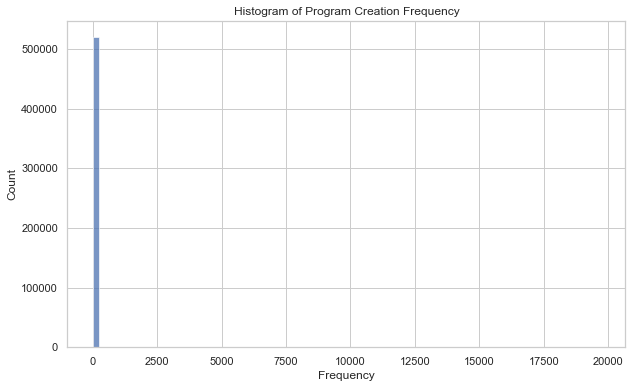

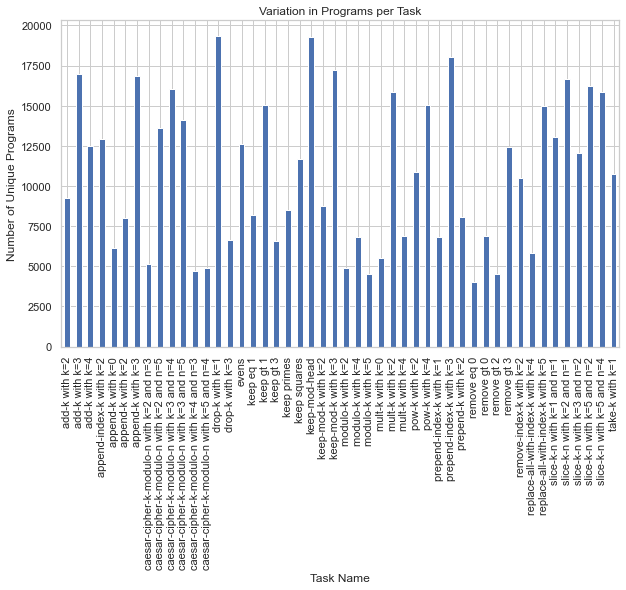

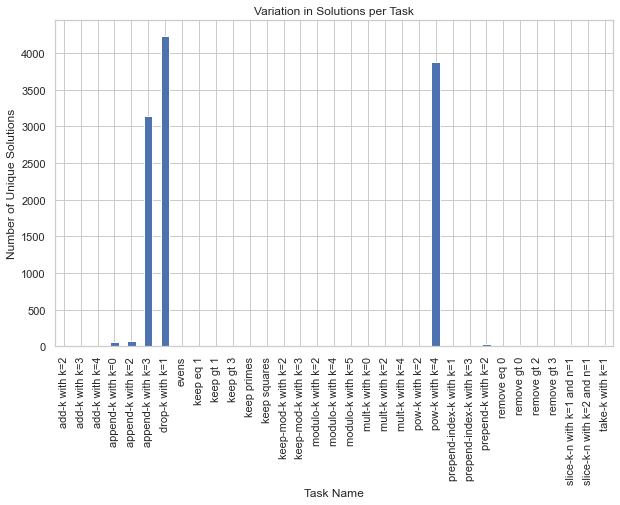

In [104]:
# Execute the functions and display the results
program_freq = program_creation_frequency(train_data)
program_vars = program_variations(train_data)
solution_vars = solution_variations(train_data)

# Plotting the visualizations
plot_program_creation_frequency(program_freq)
plot_program_variations(program_vars)
plot_solution_variations(solution_vars)

### Analysing the EM cycles
- Does the model improve with E-M cycles?
- do we find more solutions in later cycles?
- is the EM necessary? beneficial?

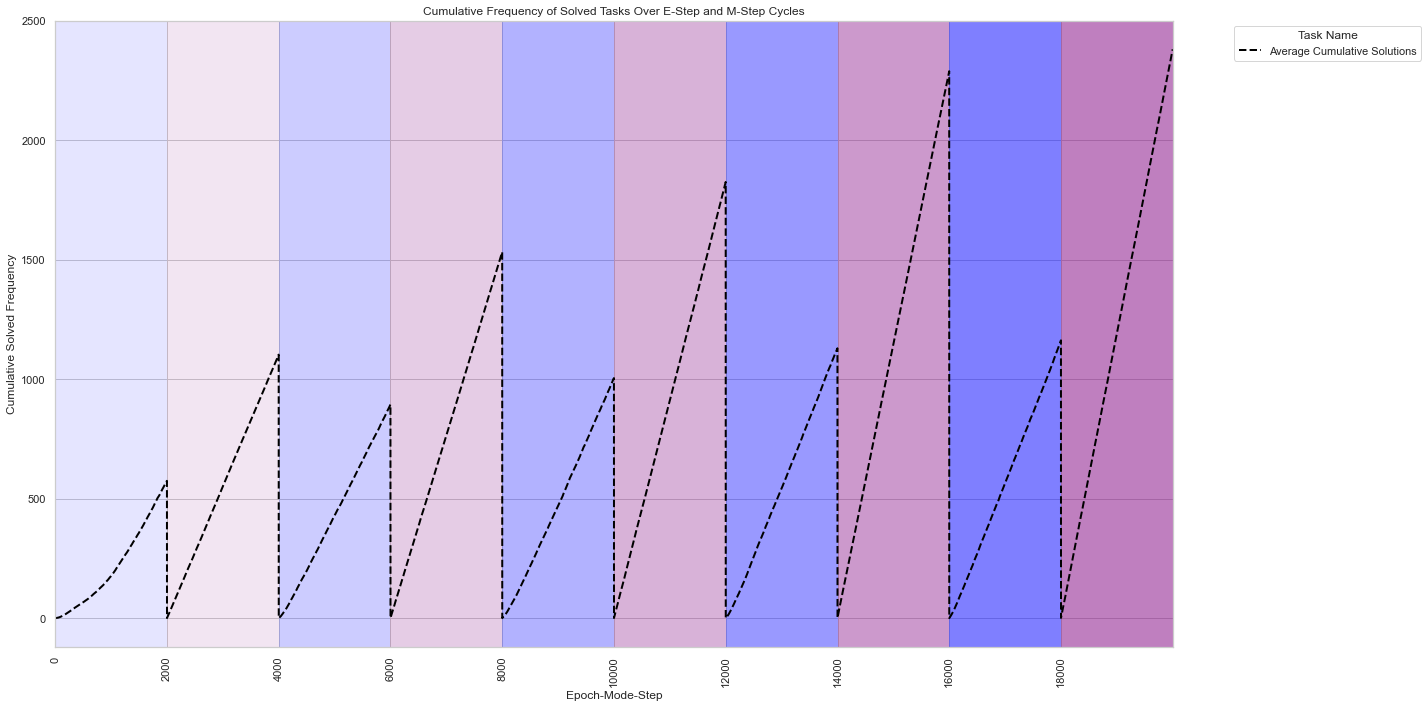

In [107]:
# First, determine the total number of steps in each mode across all epochs
total_e_steps = train_data[(train_data['Mode'] == 'e-step')]['Steps'].max() + 1  # Adding 1 because 'Steps' starts from 0
total_m_steps = train_data[(train_data['Mode'] == 'm-step')]['Steps'].max() + 1
total_steps_per_epoch = total_e_steps + total_m_steps

# Now, create a new column 'Total Steps' that will accumulate steps across epochs and modes
train_data['Total Steps'] = train_data['Epoch'] * (total_e_steps + total_m_steps) + \
                      train_data['Steps'] + \
                      np.where(train_data['Mode'] == 'm-step', total_e_steps, 0)

# We are only analysing training data here, so this is just an assertion
train_data = train_data[train_data['Mode'] != 'inference']

# Now filter out tasks that have never been solved
solved_tasks = train_data[train_data['Solved'] == True]['Task Name'].unique()
filtered_data = train_data[train_data['Task Name'].isin(solved_tasks)]

# Group and count solved instances, then calculate the cumulative sum
solved_frequency = filtered_data.groupby(['Task Name', 'Epoch', 'Mode', 'Total Steps']).agg({'Solved': 'sum'}).reset_index()

solved_frequency['Cumulative Solved'] = solved_frequency.groupby(['Task Name', 'Epoch', 'Mode'])['Solved'].cumsum()
# Calculate the averages for each total step
average_solved = solved_frequency.groupby('Total Steps')['Cumulative Solved'].mean().reset_index()

# Plotting the existing lines for each task
plt.figure(figsize=(20, 10))
# for task in solved_tasks:
#     task_data = solved_frequency[solved_frequency['Task Name'] == task]
#     plt.plot(task_data['Total Steps'], task_data['Cumulative Solved'], label=task, alpha=0.3)

# Plotting the average line
plt.plot(average_solved['Total Steps'], average_solved['Cumulative Solved'], label='Average Cumulative Solutions', color='black', linewidth=2, linestyle='--')


# Get the total steps for all epochs and set the x-ticks
num_epochs = int(solved_frequency['Epoch'].max() + 1)
total_steps = total_steps_per_epoch * num_epochs

# Set the x-ticks to show e-step and m-step intervals
plt.xticks(np.arange(0, total_steps, total_steps_per_epoch//2), np.arange(0, total_steps, total_steps_per_epoch//2), rotation=90)


# Fill the background color for e-step and m-step intervals
for epoch in range(num_epochs):
    start_e_step = epoch * total_steps_per_epoch
    end_e_step = start_e_step + total_e_steps
    start_m_step = end_e_step
    end_m_step = start_m_step + total_m_steps

    alpha = 0.1 + (epoch * 0.1)  # Adjust alpha for varying shades
    plt.axvspan(start_e_step, end_e_step, color='blue', alpha=alpha, lw=0)
    plt.axvspan(start_m_step, end_m_step, color='purple', alpha=alpha, lw=0)

# Ensure the plot includes the last m-step
plt.xlim(0, total_steps)

# Adjusting plot features for clarity
plt.title('Cumulative Frequency of Solved Tasks Over E-Step and M-Step Cycles')
plt.xlabel('Epoch-Mode-Step')
plt.ylabel('Cumulative Solved Frequency')
plt.legend(title='Task Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

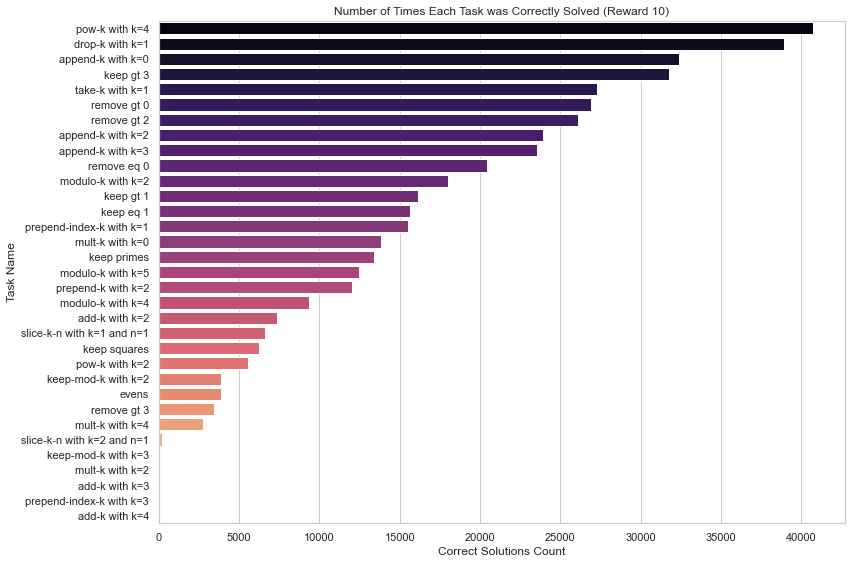

In [108]:
plot_correct_frequency(train_data)

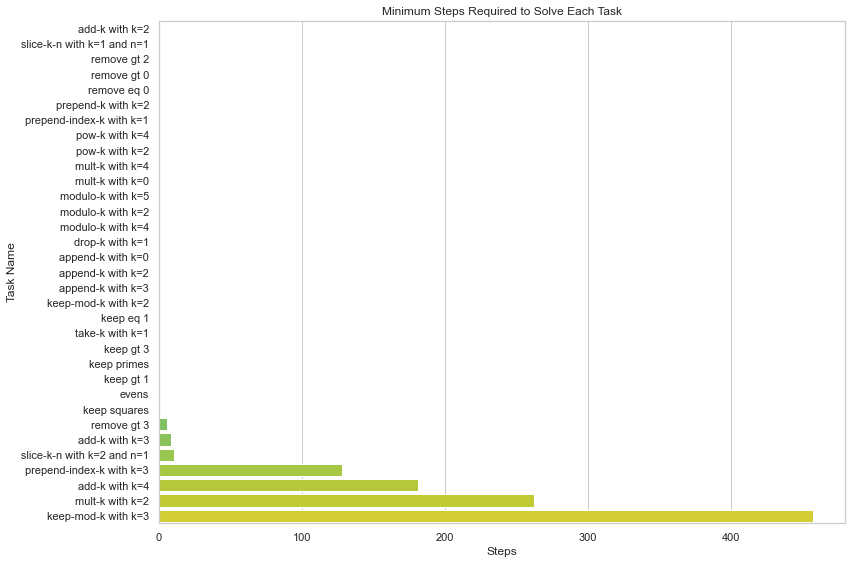

In [109]:
plot_min_step_for_solution(train_data)

# Inference

In [110]:

inference_data = pd.read_csv(depth3_trained_on_48_tasks_random_seed_1704_inference)

n_tasks = inference_data['Task Name'].unique()
print(f'Inference on {len(n_tasks)} unique tasks:')

unique_solved_ = unique_solved(inference_data)
print(f'solved {len(unique_solved_)} unique tasks.')
print(unique_solved_)

Inference on 95 unique tasks:
solved 42 unique tasks.
['add-k with k=2' 'add-k with k=4' 'append-k with k=0' 'append-k with k=1'
 'append-k with k=2' 'append-k with k=3' 'append-k with k=4'
 'append-k with k=5' 'drop-k with k=1' 'evens' 'keep-mod-k with k=2'
 'keep-mod-k with k=3' 'modulo-k with k=1' 'modulo-k with k=2'
 'modulo-k with k=3' 'modulo-k with k=4' 'modulo-k with k=5'
 'mult-k with k=0' 'mult-k with k=2' 'pow-k with k=2' 'pow-k with k=3'
 'pow-k with k=4' 'prepend-k with k=0' 'prepend-k with k=1'
 'prepend-k with k=2' 'remove-index-k with k=1'
 'slice-k-n with k=1 and n=1' 'slice-k-n with k=2 and n=1' 'tail'
 'take-k with k=1' 'keep squares' 'keep primes' 'keep eq 0' 'remove eq 0'
 'keep gt 0' 'remove gt 0' 'keep eq 1' 'keep gt 1' 'keep gt 2'
 'remove gt 2' 'keep gt 3' 'remove gt 3']


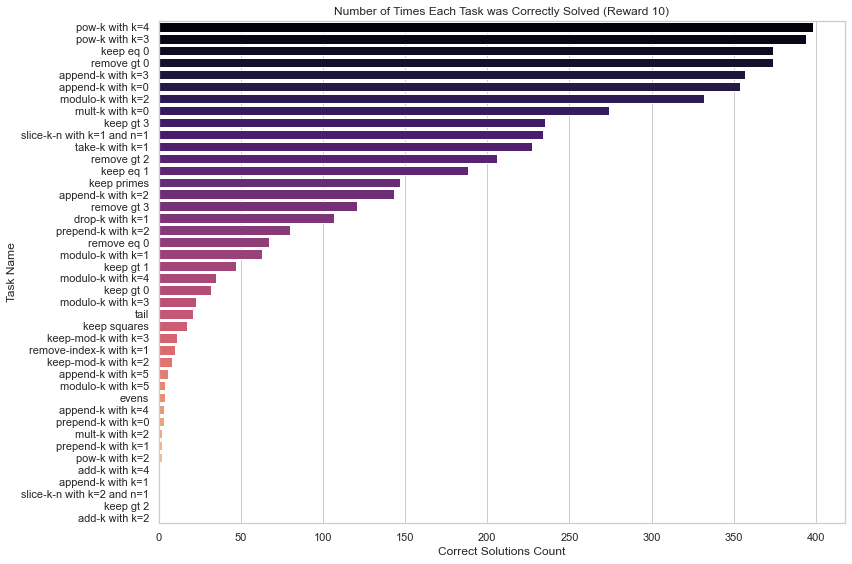

In [111]:
plot_correct_frequency(inference_data)

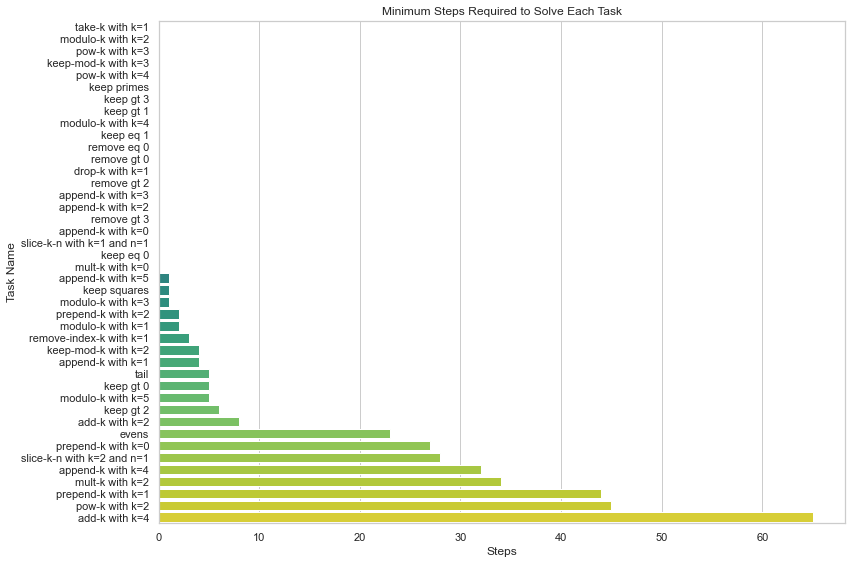

In [112]:
plot_min_step_for_solution(inference_data)